In [ ]:
print('hello')

hello


In [1]:
!nvidia-smi

Tue Jan 28 09:19:10 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              43W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 31.4/235.7 GB disk)


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

workspace = rf.workspace("liangdianzhong")
project = rf.workspace("starter-3re5h").project("gap-pattern-kjvnx")
version = project.version(4)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to gap-pattern-4 in yolov11:: 100%|██████████| 2857/2857 [00:00<00:00, 8369.79it/s]


In [9]:
# used 0.71 compute units
%cd {HOME}

!yolo task=detect mode=train model=yolo11l.pt data=/content/datasets/gap-pattern-4/data.yaml epochs=100 batch=64 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/datasets/gap-pattern-4/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

In [10]:
!ls {HOME}/runs/detect/train4/

args.yaml					     P_curve.png	  train_batch1981.jpg
confusion_matrix_normalized.png			     PR_curve.png	  train_batch1982.jpg
confusion_matrix.png				     R_curve.png	  train_batch1.jpg
events.out.tfevents.1738057938.48562e048b01.10604.0  results.csv	  train_batch2.jpg
F1_curve.png					     results.png	  val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	  val_batch0_pred.jpg
labels.jpg					     train_batch1980.jpg  weights


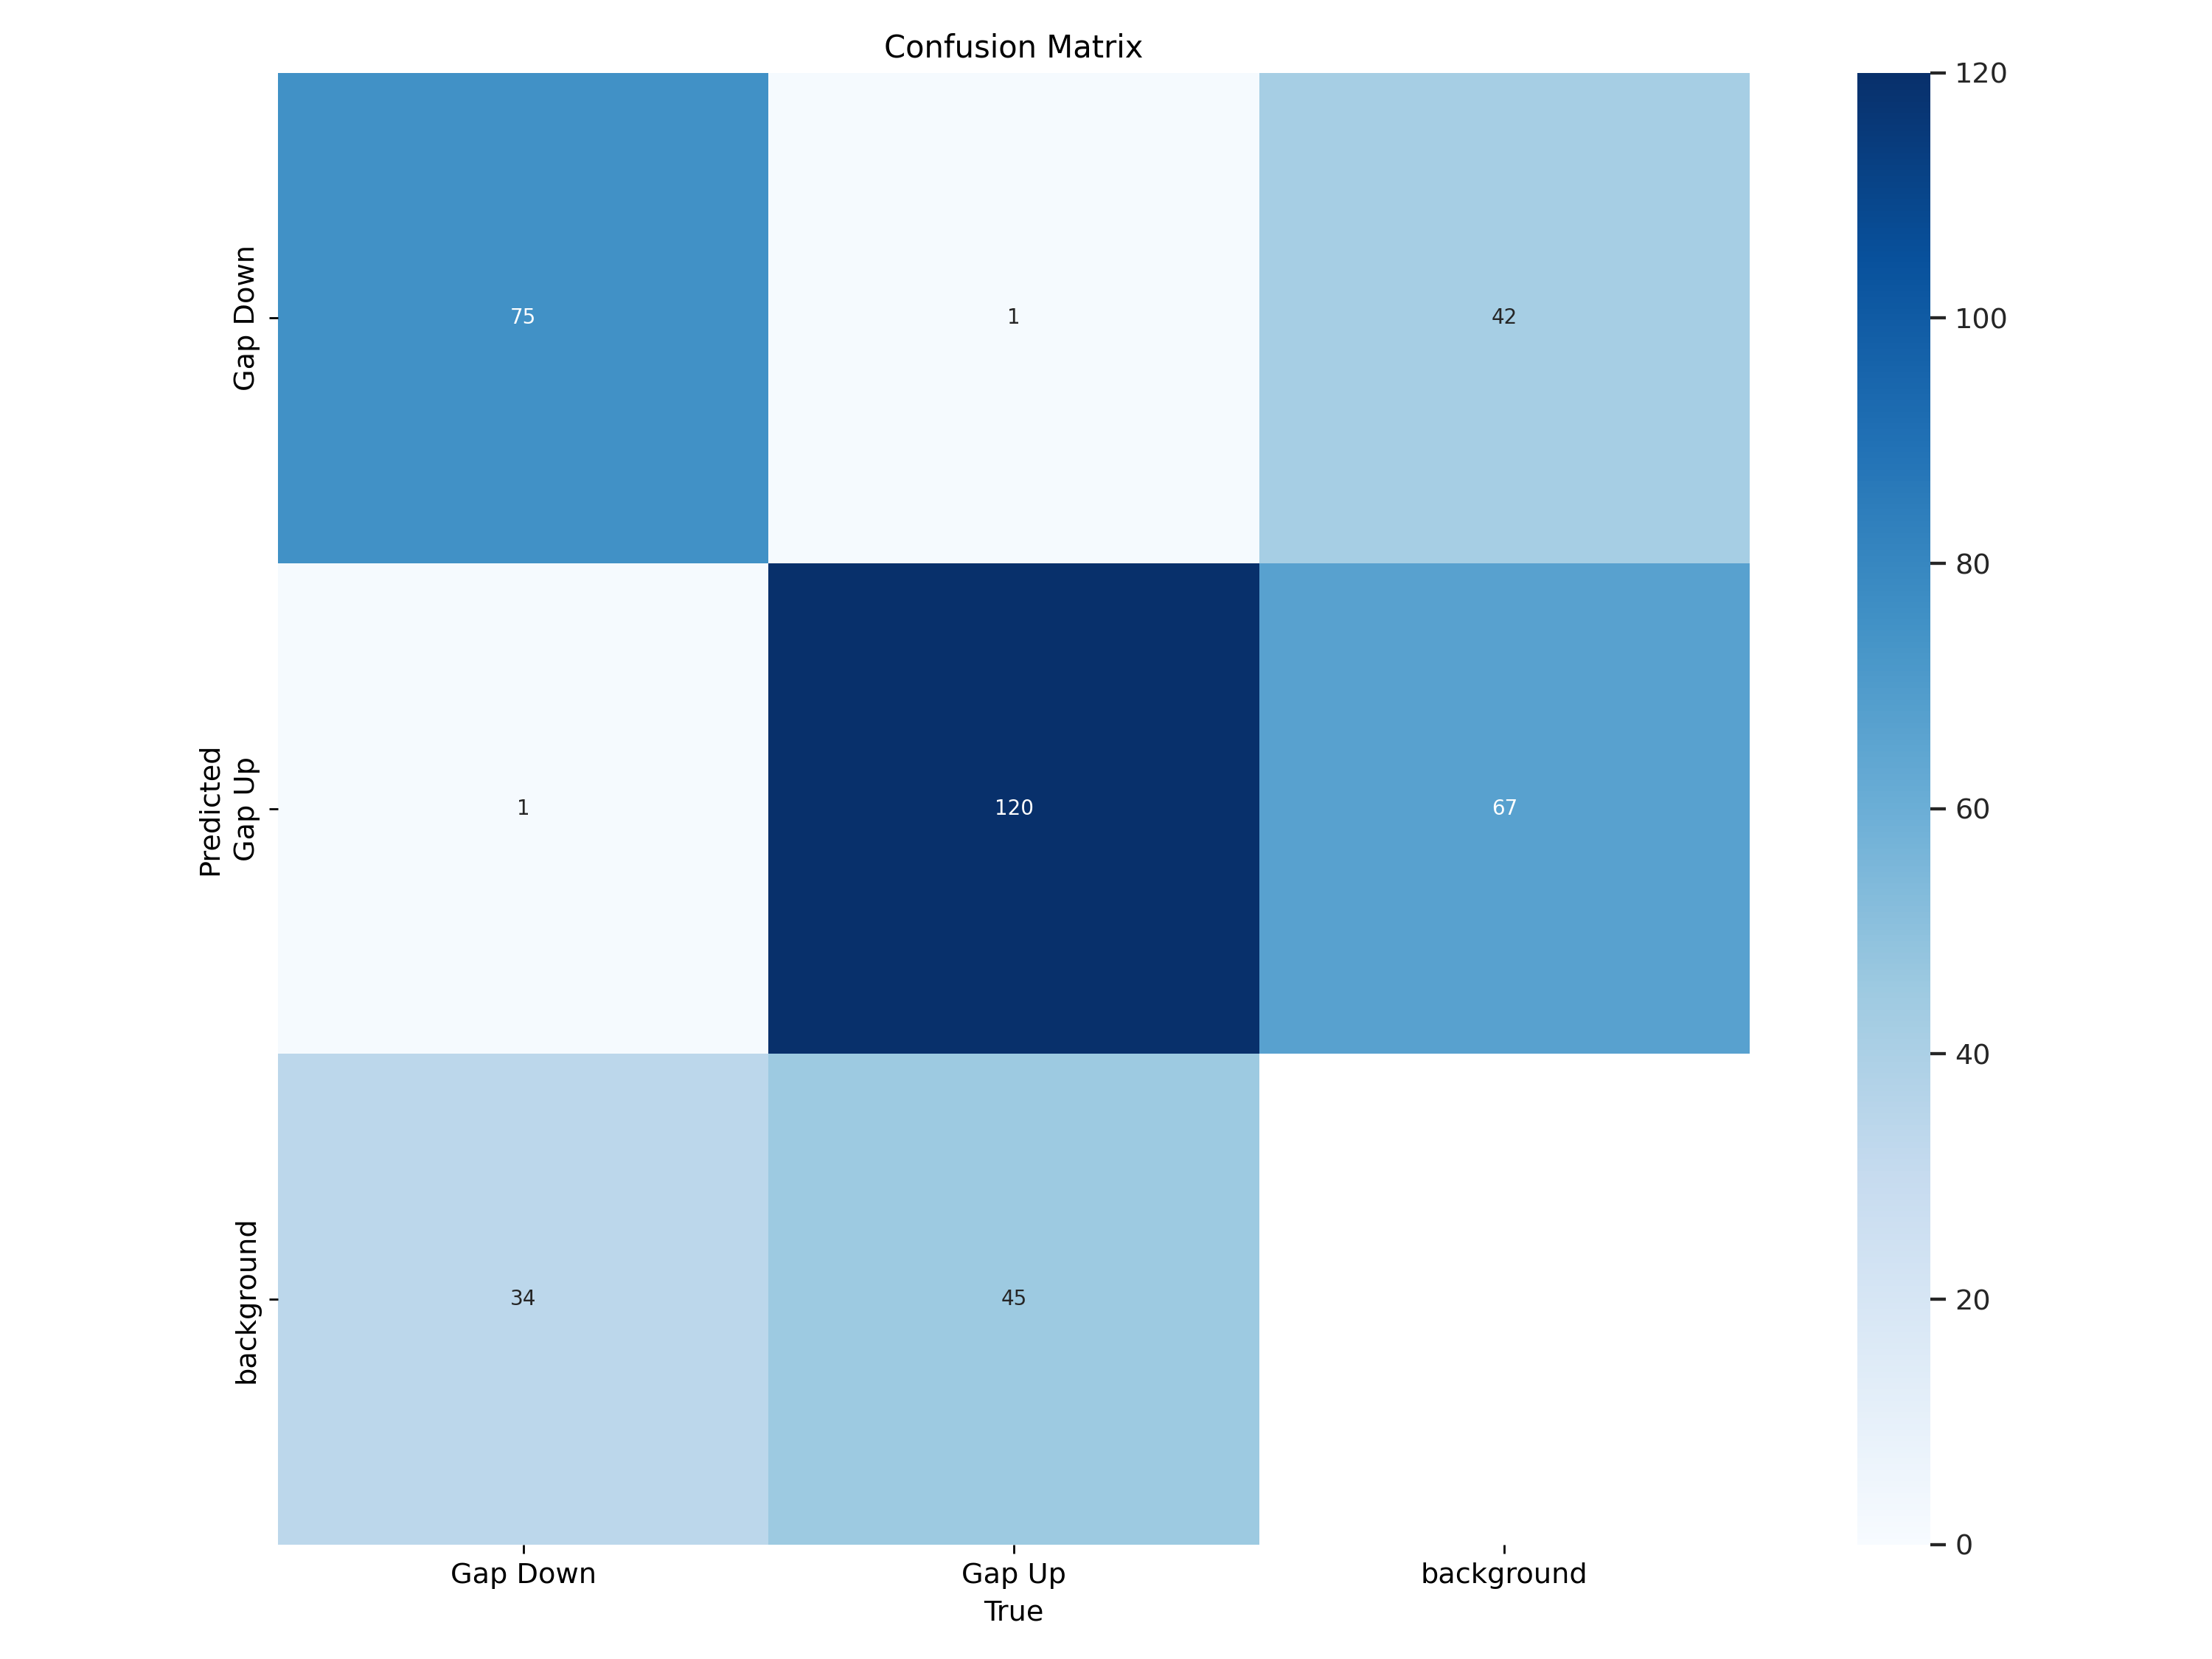

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

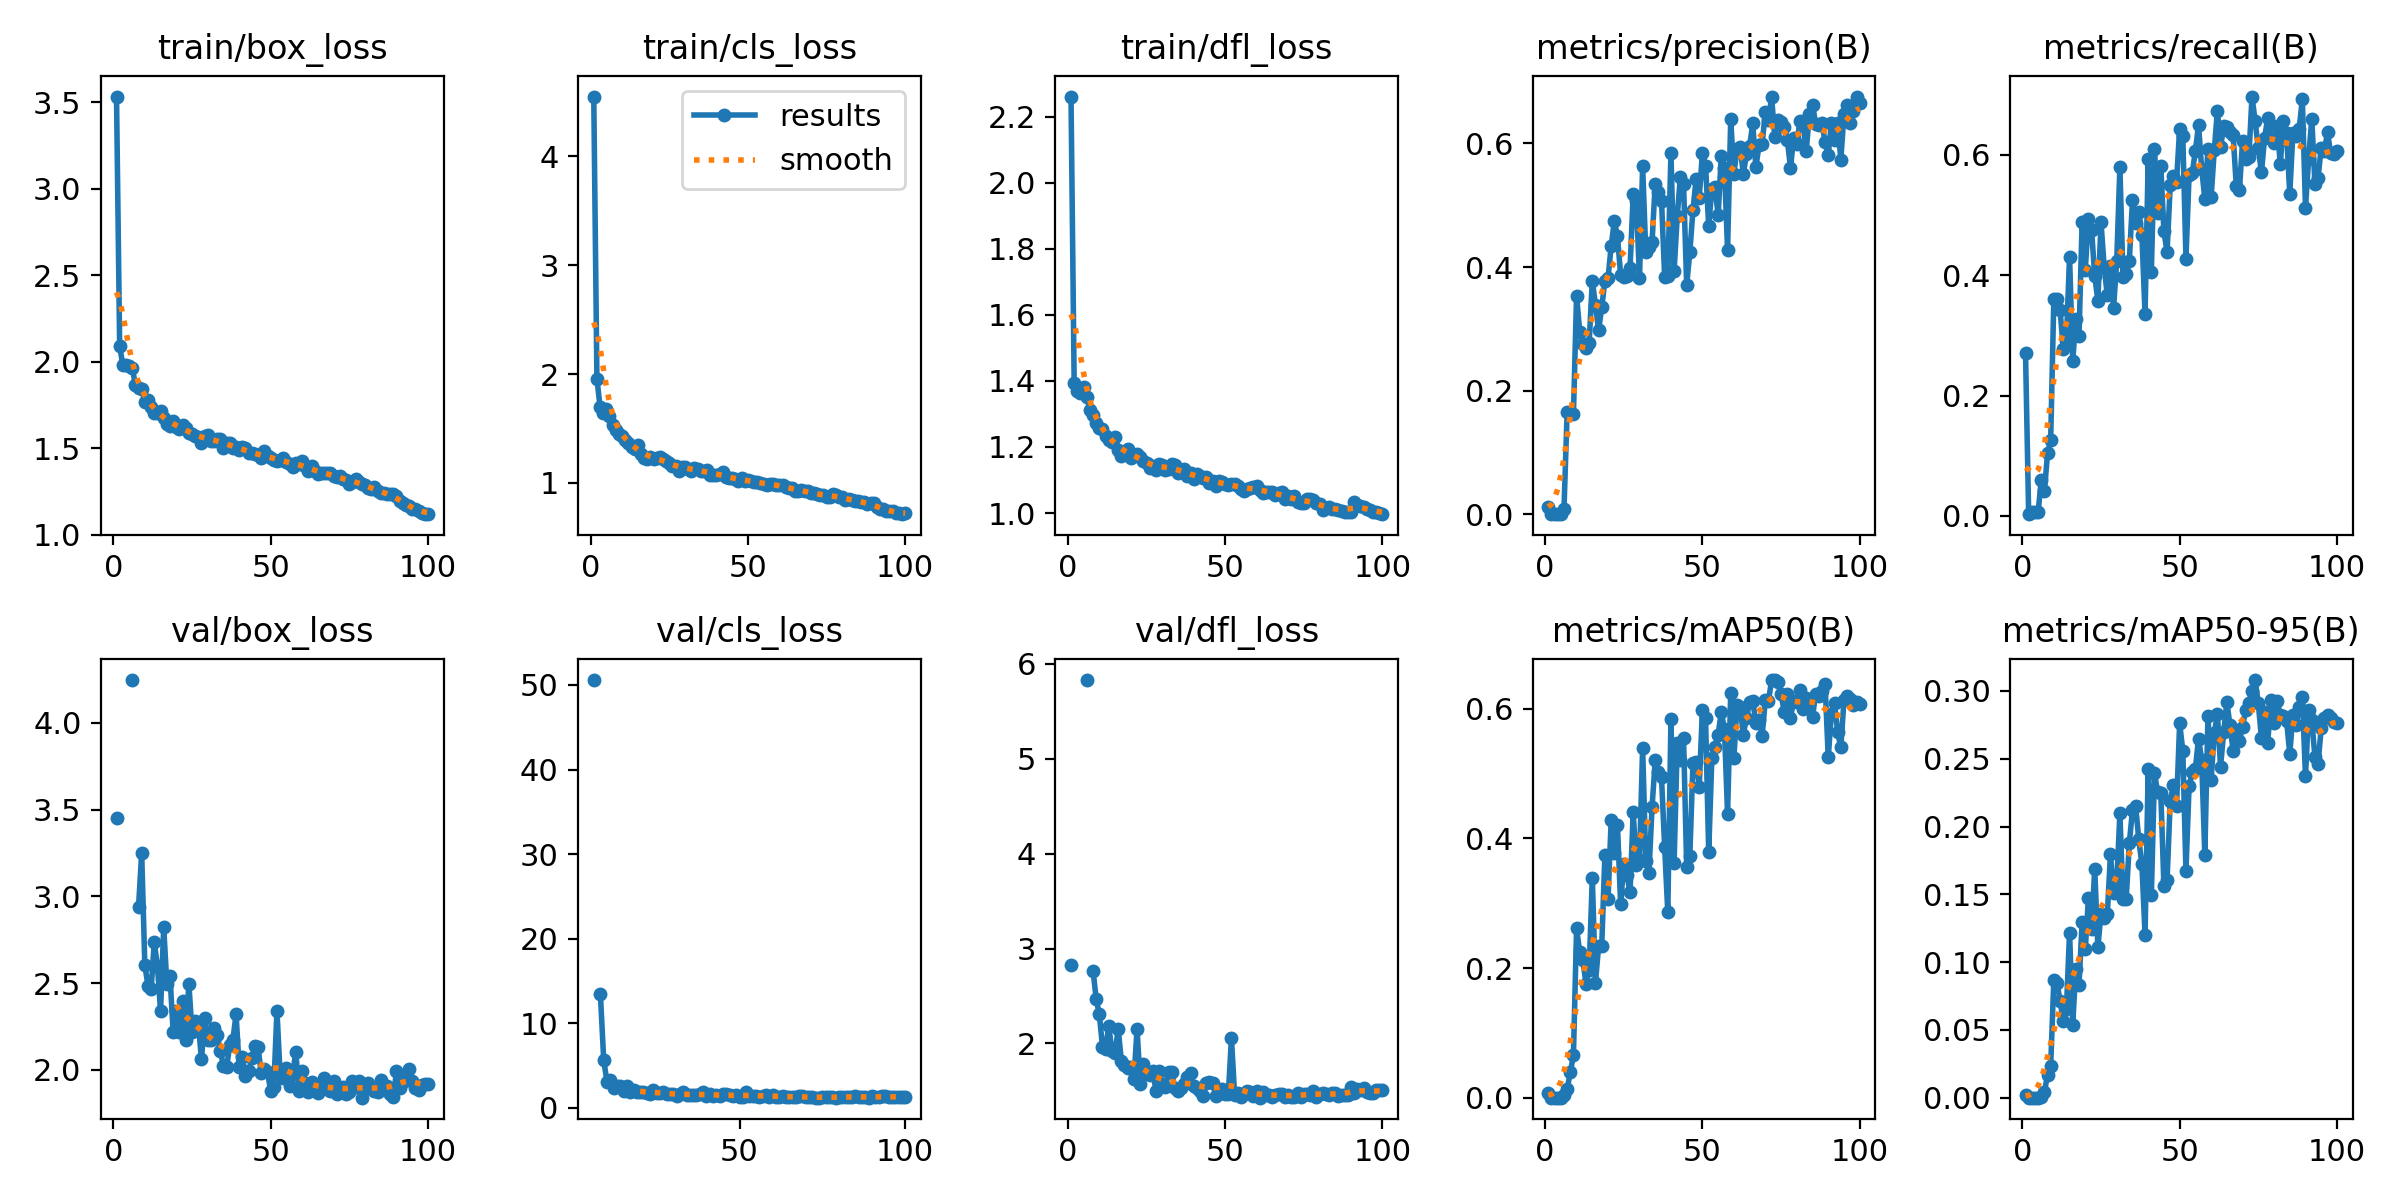

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

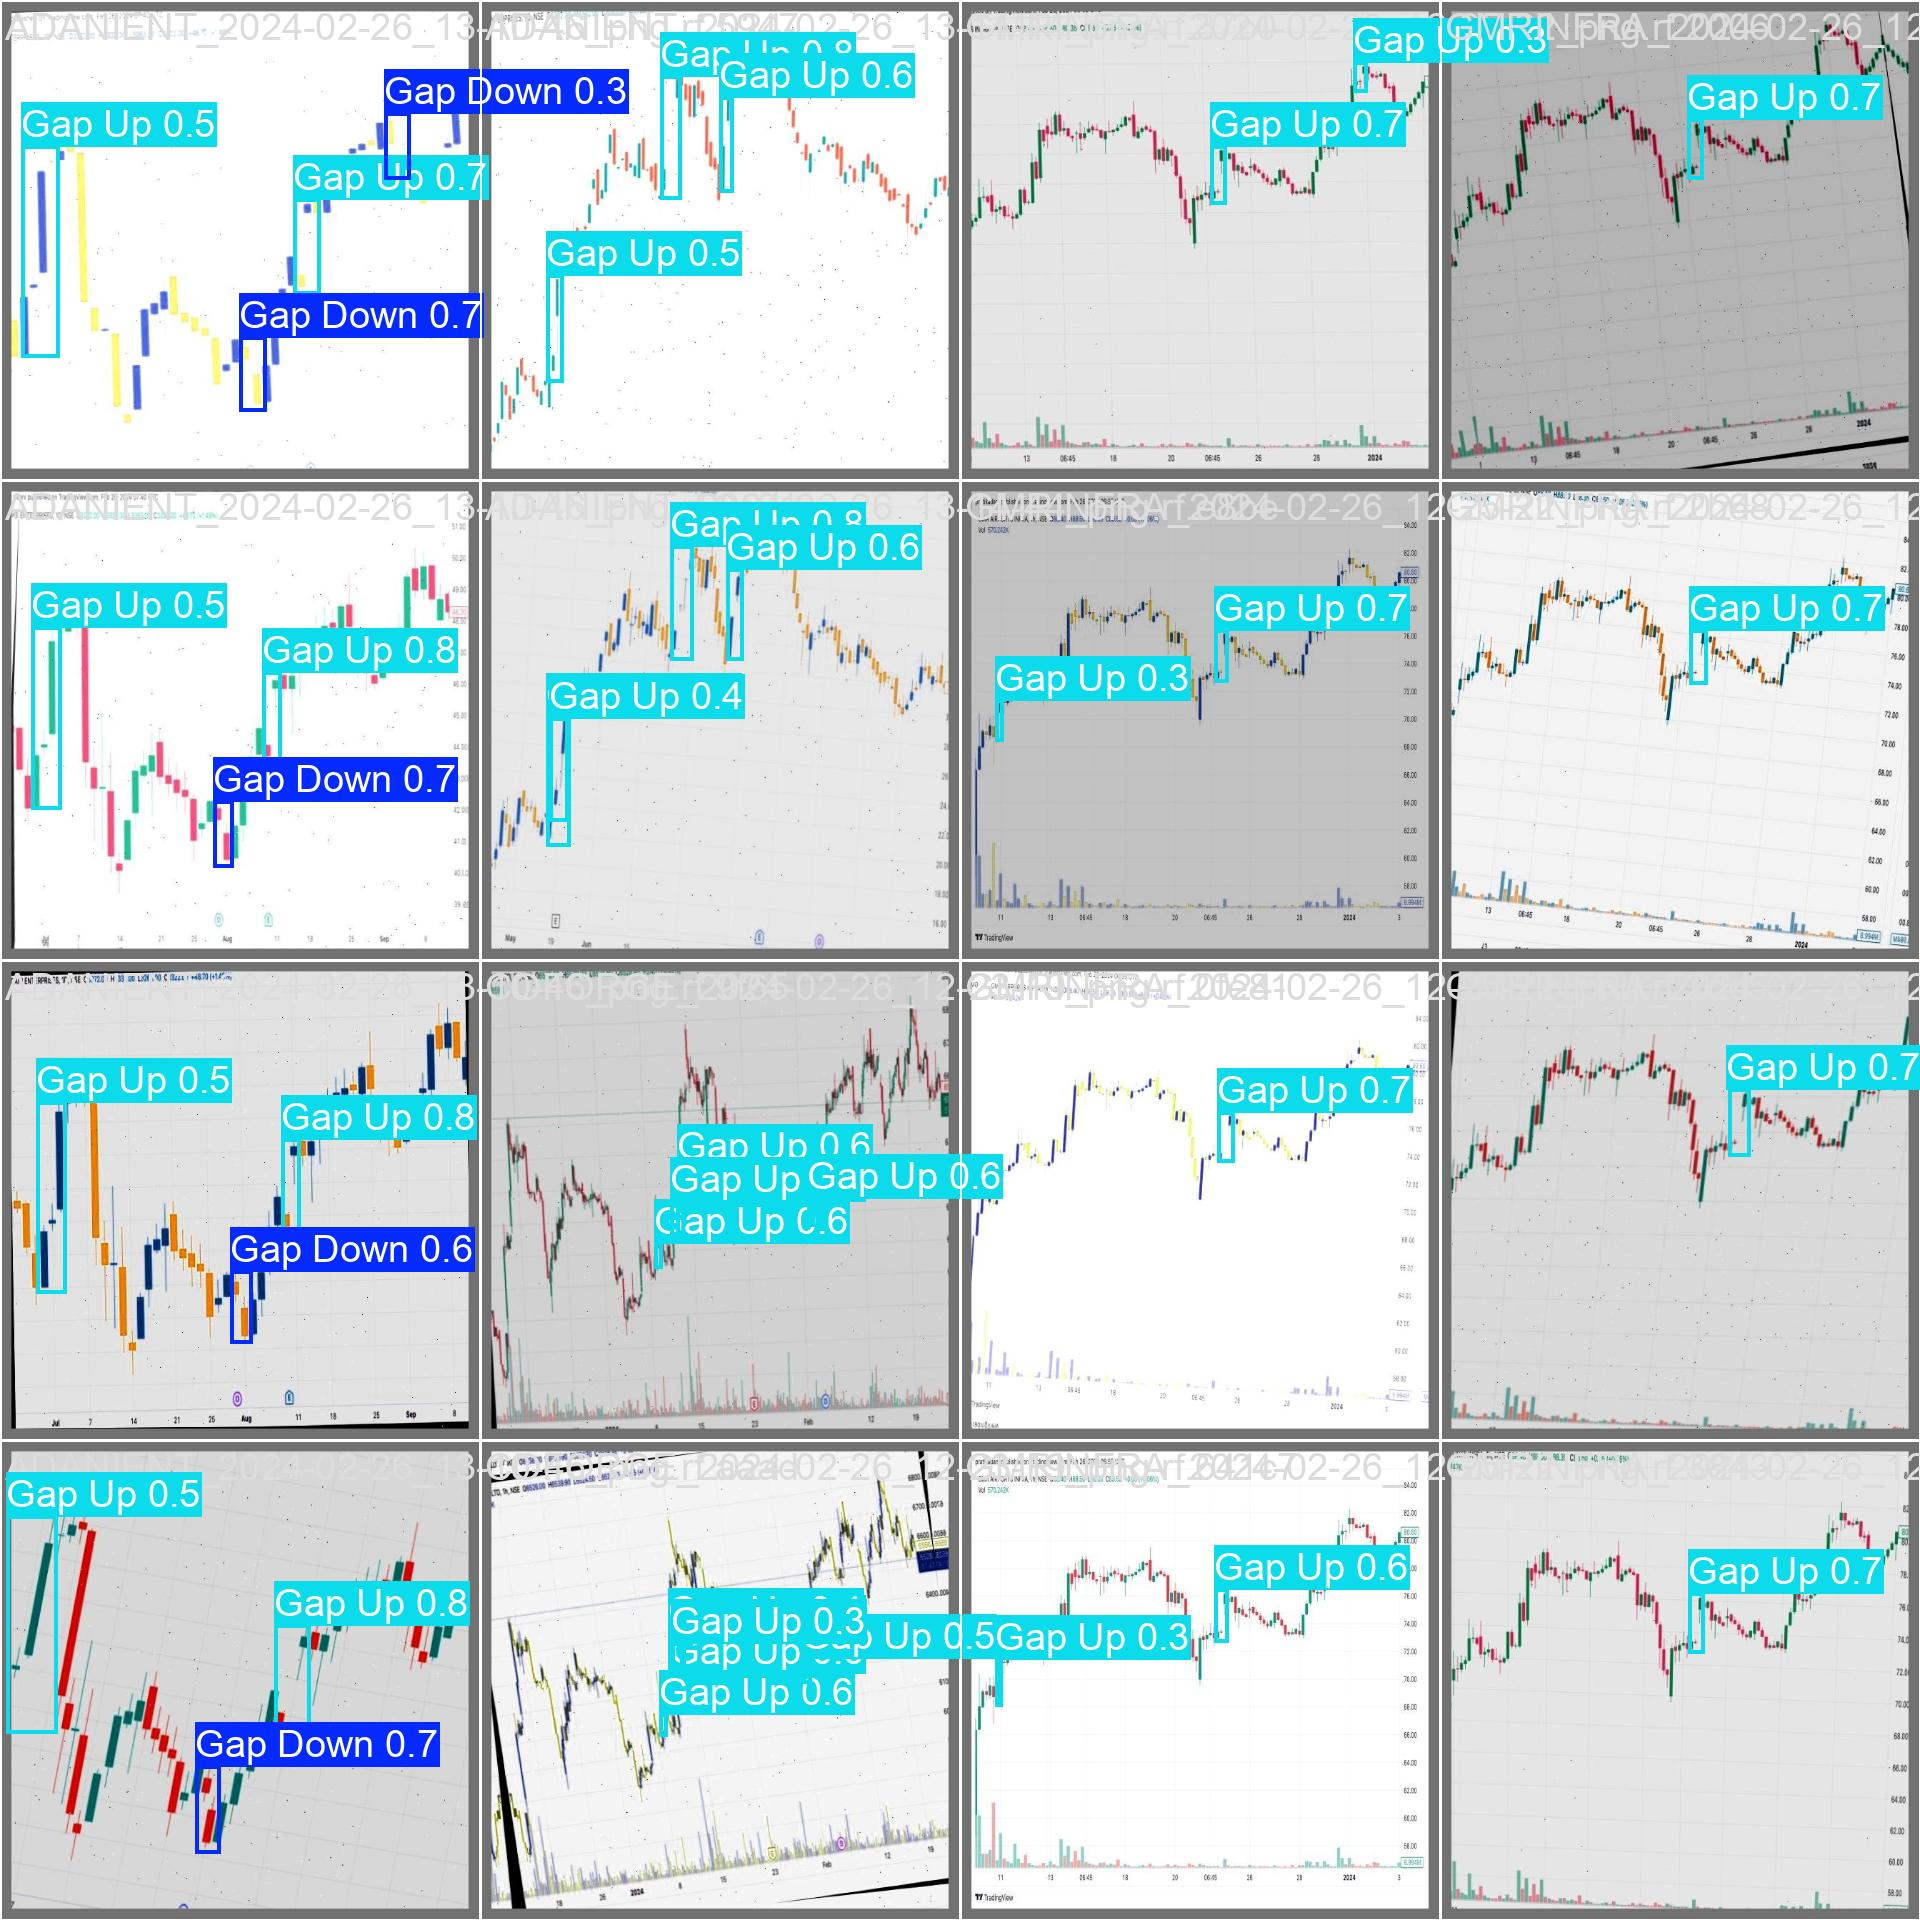

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

In [14]:
!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11l summary (fused): 464 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs
val: Scanning /content/datasets/gap-pattern-4/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.65it/s]
                   all         50        276      0.642      0.657       0.64      0.309
              Gap Down         29        110      0.631      0.638      0.604       0.29
                Gap Up         49        166      0.652      0.675      0.676      0.327
Speed: 4.0ms preprocess, 12.7ms inference, 0.1ms loss, 22.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
!yolo detect predict model={HOME}/runs/detect/train4/weights/best.pt source='/content/test' imgsz=640

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11l summary (fused): 464 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs

image 1/9 /content/test/Screenshot (120).png: 640x640 2 Gap Downs, 17.3ms
image 2/9 /content/test/Screenshot (121).png: 640x640 1 Gap Down, 17.5ms
image 3/9 /content/test/Screenshot (122).png: 640x640 (no detections), 16.7ms
image 4/9 /content/test/Screenshot (123).png: 640x640 5 Gap Downs, 3 Gap Ups, 16.4ms
image 5/9 /content/test/Screenshot (124).png: 640x640 2 Gap Downs, 2 Gap Ups, 16.8ms
image 6/9 /content/test/Screenshot (125).png: 640x640 (no detections), 16.3ms
image 7/9 /content/test/Screenshot (126).png: 640x640 1 Gap Down, 3 Gap Ups, 21.7ms
image 8/9 /content/test/Screenshot (127).png: 640x640 1 Gap Up, 20.4ms
image 9/9 /content/test/d5UmJ.png: 640x640 (no detections), 16.6ms
Speed: 2.3ms preprocess, 17.7ms inference, 70.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/dete

In [17]:
!apt-get install zip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
zip is already the newest version (3.0-12build2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [18]:
!zip -r /content/session_files.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.01.24/ (stored 0%)
  adding: content/.config/logs/2025.01.24/14.22.05.377649.log (deflated 58%)
  adding: content/.config/logs/2025.01.24/14.21.25.504071.log (deflated 93%)
  adding: content/.config/logs/2025.01.24/14.22.00.566262.log (deflated 87%)
  adding: content/.config/logs/2025.01.24/14.21.53.195837.log (deflated 58%)
  adding: content/.config/logs/2025.01.24/14.22.13.898546.log (deflated 56%)
  adding: content/.config/logs/2025.01.24/14.22.13.270600.log (deflated 58%)
  adding: content/.config/.last_upd

In [ ]:
from google.colab import files
files.download('/content/session_files.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>